In [1]:
#data wrangling
import pandas as pd

#datetime
import datetime as dt


In [2]:
# load sheet Transactions trong file KPMG và in ra 5 dòng đầu tiên
#KPMG = pd.ExcelFile('C:\Users\Admin\Downloads\KPMG_Milestone_Project\KPMG_Milestone_Project\KPMG\KPMG.xlsx')
transaction = pd.read_excel('KPMG.xlsx', sheet_name="Transactions")
#new_cus_list = pd.read_excel('KPMG.xlsx', sheet_name="NewCustomerList")
#cus_demographic = pd.read_excel('KPMG.xlsx', sheet_name="CustomerDemographic")
#cus_address = pd.read_excel('KPMG.xlsx', sheet_name="CustomerAddress")
print(transaction.head())

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62        

In [3]:
# in ra info bảng
print(transaction.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [4]:
# describe default
print(transaction.describe())

       transaction_id   product_id   customer_id  online_order    list_price  \
count    20000.000000  20000.00000  20000.000000  19640.000000  20000.000000   
mean     10000.500000     45.36465   1738.246050      0.500458   1107.829449   
std       5773.647028     30.75359   1011.951046      0.500013    582.825242   
min          1.000000      0.00000      1.000000      0.000000     12.010000   
25%       5000.750000     18.00000    857.750000      0.000000    575.270000   
50%      10000.500000     44.00000   1736.000000      1.000000   1163.890000   
75%      15000.250000     72.00000   2613.000000      1.000000   1635.300000   
max      20000.000000    100.00000   5034.000000      1.000000   2091.470000   

       standard_cost  product_first_sold_date  
count   19803.000000             19803.000000  
mean      556.046951             38199.776549  
std       405.955660              2875.201110  
min         7.210000             33259.000000  
25%       215.140000             35667.

In [5]:
# describe các biến object
print(transaction.describe(include = ['O']))

       order_status  brand product_line product_class product_size
count         20000  19803        19803         19803        19803
unique            2      6            4             3            3
top        Approved  Solex     Standard        medium       medium
freq          19821   4253        14176         13826        12990


In [6]:
# describe all
print(transaction.describe(include = 'all'))

        transaction_id   product_id   customer_id     transaction_date  \
count     20000.000000  20000.00000  20000.000000                20000   
unique             NaN          NaN           NaN                  364   
top                NaN          NaN           NaN  2017-02-14 00:00:00   
freq               NaN          NaN           NaN                   82   
first              NaN          NaN           NaN  2017-01-01 00:00:00   
last               NaN          NaN           NaN  2017-12-30 00:00:00   
mean      10000.500000     45.36465   1738.246050                  NaN   
std        5773.647028     30.75359   1011.951046                  NaN   
min           1.000000      0.00000      1.000000                  NaN   
25%        5000.750000     18.00000    857.750000                  NaN   
50%       10000.500000     44.00000   1736.000000                  NaN   
75%       15000.250000     72.00000   2613.000000                  NaN   
max       20000.000000    100.00000   

C:\Users\Admin\AppData\Local\Temp\ipykernel_16104\467461804.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(transaction.describe(include = 'all'))


In [7]:
# count số dòng bị null ở mỗi cột
transaction.isnull().sum(axis = 0)

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

# 1. Data Correction

## 1.1 Drop NA

In [8]:
# tạo bảng df_dropna_all bằng cách loại bỏ tất cả giá trị null trong bảng và in ra info
df_dropna_all = transaction.dropna()
print(df_dropna_all.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [9]:
# tạo bảng df_dropna_online_order bằng cách loại bỏ giá trị null trong cột online_order và in ra info
df_dropna_online_order = transaction.dropna(subset='online_order')
print(df_dropna_online_order.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19640 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19640 non-null  int64         
 1   product_id               19640 non-null  int64         
 2   customer_id              19640 non-null  int64         
 3   transaction_date         19640 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             19640 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19640 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

## 1.2 Fill NA

In [10]:
# fill tất cả NA bằng 0, lưu vào bảng df_fillna_0 và in ra info
df_fillna_0 = transaction.fillna(0)
print(df_fillna_0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [11]:
# fill NA bằng ffill, lưu vào bảng df_fillna_ffill và in ra info
df_fillna_ffill = transaction.ffill
print(df_fillna_ffill)

<bound method DataFrame.ffill of        transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25           0.0   
1                   2           3         3120       2017-05-21           1.0   
2                   3          37          402       2017-10-16           0.0   
3                   4          88         3135       2017-08-31           0.0   
4                   5          78          787       2017-10-01           1.0   
...               ...         ...          ...              ...           ...   
19995           19996          51         1018       2017-06-24           1.0   
19996           19997          41          127       2017-11-09           1.0   
19997           19998          87         2284       2017-04-14           1.0   
19998           19999           6         2764       2017-07-03           0.0   
19999           20000          11         1144       2017-09-22           1.

In [12]:
# fill NA bằng bfill, lưu vào bảng df_fillna_bfill và in ra info
df_fillna_bfill = transaction.bfill
print(df_fillna_bfill)

<bound method DataFrame.bfill of        transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25           0.0   
1                   2           3         3120       2017-05-21           1.0   
2                   3          37          402       2017-10-16           0.0   
3                   4          88         3135       2017-08-31           0.0   
4                   5          78          787       2017-10-01           1.0   
...               ...         ...          ...              ...           ...   
19995           19996          51         1018       2017-06-24           1.0   
19996           19997          41          127       2017-11-09           1.0   
19997           19998          87         2284       2017-04-14           1.0   
19998           19999           6         2764       2017-07-03           0.0   
19999           20000          11         1144       2017-09-22           1.

## 1.3. Assess Categorical Data

In [13]:
# load sheet Demographic và hiển thị 5 dòng đầu tiên
cus_demographic = pd.read_excel('KPMG.xlsx', sheet_name="CustomerDemographic")
print(cus_demographic.head())

   customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   61 1954-01-20      Recruiting Manager   
3                                   33 1961-10-03                     NaN   
4                                   56 1977-05-13           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator  \
0                Health      Mass Customer                  N   
1    Financial Services      Mass Customer                  N   
2              Property

C:\Users\Admin\AppData\Local\Temp\ipykernel_16104\2086416319.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  cus_demographic = pd.read_excel('KPMG.xlsx', sheet_name="CustomerDemographic")


In [14]:
# in ra info bảng
print(cus_demographic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [15]:
# describe các giá trị object
print(cus_demographic.describe(include = ['O']))

       first_name last_name  gender                             job_title  \
count        4000      3875    4000                                  3494   
unique       3139      3725       6                                   195   
top           Max  Pristnor  Female  Business Systems Development Analyst   
freq            5         3    2037                                    45   

       job_industry_category wealth_segment deceased_indicator  default  \
count                   3344           4000               4000     3698   
unique                     9              3                  2       90   
top            Manufacturing  Mass Customer                  N      100   
freq                     799           2000               3998      113   

       owns_car  
count      4000  
unique        2  
top         Yes  
freq       2024  


In [16]:
# Remove all NA rows, then use output for the following steps
cus_demographic_notnull= cus_demographic.dropna()

In [17]:
# In ra các giá trị unique của cột gender
print(cus_demographic_notnull['gender'].unique())

['F' 'Male' 'Female' 'Femal']


In [18]:
# Quy chuẩn cột gender về các nhóm Male, Female, Unisex và in ra giá trị unique mới
cus_demographic_notnull = cus_demographic_notnull.replace(to_replace=["F","Femal"],value="Female")
print(cus_demographic_notnull['gender'].unique())

['Female' 'Male']


In [19]:
# Tính tuổi của mỗi khách hàng, lưu vào cột "age" và in ra min age, max age
cus_demographic_notnull['DOB'] = pd.to_datetime(cus_demographic_notnull['DOB'], format='%Y%m%d')
now = pd.to_datetime('now')
cus_demographic_notnull['age'] = (now.year - cus_demographic_notnull['DOB'].dt.year) - ((now.month - cus_demographic_notnull['DOB'].dt.month) < 0)
print(cus_demographic_notnull['age'].min())
print(cus_demographic_notnull['age'].max())

20
91


C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


In [20]:
# phân nhóm khách hàng dưới 35 tuổi là nhóm "Young", Từ 35 - 55 là "Middle", trên 55 là "Older"
# lưu vào cột "age_group" bằng cách sử dụng hàm cut
cus_demographic_notnull['age_group'] = pd.cut(x=cus_demographic_notnull['age'], bins=[20, 35, 55, 91], labels=['Young', 'Middle', 'Older'])
cus_demographic_notnull[['age','age_group']]

,age,age_group
0,69,Older
1,41,Middle
2,68,Older
8,49,Middle
9,34,Young
...,...,...
3992,47,Middle
3993,33,Young
3994,46,Middle
3995,47,Middle


# 2. Data Completeness

In [21]:
#join bảng transactions vs demographic (đều đã dropna) và in ra những giao dịch thiếu thông tin demographic (last name hoặc first name)
df_transaction_all = transaction.dropna()
df_demographic_all = cus_demographic.dropna()
trans_demo = pd.merge(df_transaction_all, df_demographic_all, on="customer_id")
trans_demo.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12982 entries, 0 to 12981
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       12982 non-null  int64         
 1   product_id                           12982 non-null  int64         
 2   customer_id                          12982 non-null  int64         
 3   transaction_date                     12982 non-null  datetime64[ns]
 4   online_order                         12982 non-null  float64       
 5   order_status                         12982 non-null  object        
 6   brand                                12982 non-null  object        
 7   product_line                         12982 non-null  object        
 8   product_class                        12982 non-null  object        
 9   product_size                         12982 non-null  object        
 10  list_price

In [22]:
trans_demo_null = pd.merge(transaction, cus_demographic, on="customer_id")
trans_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12982 entries, 0 to 12981
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       12982 non-null  int64         
 1   product_id                           12982 non-null  int64         
 2   customer_id                          12982 non-null  int64         
 3   transaction_date                     12982 non-null  datetime64[ns]
 4   online_order                         12982 non-null  float64       
 5   order_status                         12982 non-null  object        
 6   brand                                12982 non-null  object        
 7   product_line                         12982 non-null  object        
 8   product_class                        12982 non-null  object        
 9   product_size                         12982 non-null  object        
 10  list_price

# 3. Data Aggregation (after dropping null values)

In [23]:
# tính tổng khách hàng có phát sinh giao dịch bằng hàm nunique
trans_demo['customer_id'].nunique()

2329

<class 'pandas.core.frame.DataFrame'>


In [25]:
# Tính số khách hàng mỗi tháng
# hint 1: tạo column year_month bằng hàm dt.strftime
# hint 2: group by year_month và nunique
trans_demo['year_month'] = trans_demo['transaction_date'].dt.strftime('%b-%Y')
trans_demo.groupby(['year_month'])['customer_id'].nunique()

year_month
Apr-2017    876
Aug-2017    888
Dec-2017    877
Feb-2017    859
Jan-2017    878
Jul-2017    868
Jun-2017    826
Mar-2017    848
May-2017    871
Nov-2017    869
Oct-2017    886
Sep-2017    826
Name: customer_id, dtype: int64

In [26]:
# Tính gross margin của mỗi tháng. gross_margin = list_price - standard_cost
# hint 1: tạo column gross_margin
# hint 2: group by year_month và sử dụng hàm agg
trans_demo['gross_margin'] = trans_demo['list_price'] - trans_demo['standard_cost']
trans_demo.groupby('year_month').agg({'gross_margin':sum})

,gross_margin
year_month,
Apr-2017,614345.11
Aug-2017,629727.79
Dec-2017,581086.57
Feb-2017,585956.49
Jan-2017,598361.59
Jul-2017,602030.44
Jun-2017,557927.11
Mar-2017,583459.93
May-2017,612053.28


In [27]:
# Tính số lượng order và doanh thu group by online_order và order_status 
# hint 1: group by online_order, order_status và sử dụng hàm agg
trans_demo.groupby(['online_order','order_status']).agg({'list_price':sum})

list_price
online_order order_status            
0.0          Approved      7177595.84
             Cancelled       61234.06
1.0          Approved      7073731.30
             Cancelled       85719.15

In [28]:
trans_demo.groupby(['online_order','order_status'])['transaction_id'].count()

online_order  order_status
0.0           Approved        6456
              Cancelled         51
1.0           Approved        6399
              Cancelled         76
Name: transaction_id, dtype: int64

# 4. Data Visualization

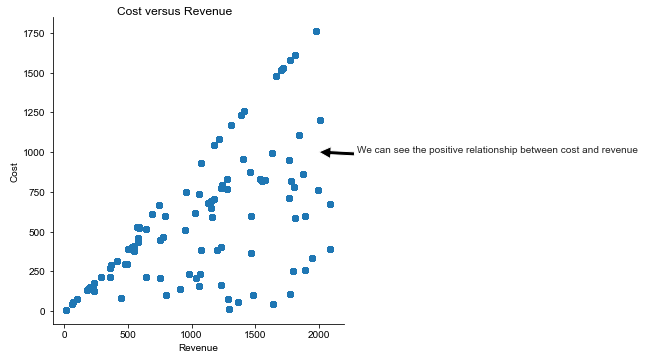

In [29]:
# Sử dụng seaborn và vẽ ra 5 chart khác nhau (column, line, box,...) với đầy đủ tên chart, tên các trục và chú thích.
# Comment insight/message muốn truyền tải thông qua từng chart

import seaborn as sns
import matplotlib.pyplot as plt

# Chart 1: Scratter plot
chart_1 = sns.lmplot(x='list_price', y='standard_cost', data=trans_demo, fit_reg=False)
chart_1.fig.suptitle("Cost versus Revenue", y=1)
sns.set_style("whitegrid")
plt.annotate("We can see the positive relationship between cost and revenue",xy=(2000,1000),xytext=(2300, 1000),
             arrowprops=dict(facecolor='black'))
chart_1.set(xlabel="Revenue",ylabel="Cost")
plt.show()


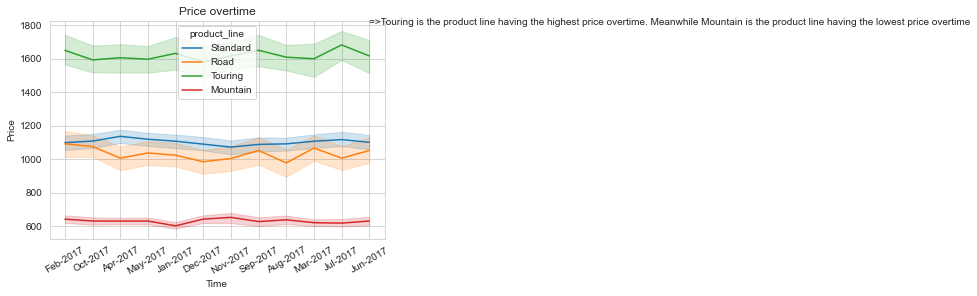

In [30]:
#Chart 2: Line chart
chart_2 = sns.lineplot(x="year_month", y="list_price",
                 data=trans_demo,
                 hue="product_line")
chart_2.set_title("Price overtime")
plt.xticks(rotation=30)
chart_2.set(xlabel="Time",
       ylabel="Price")
plt.annotate("=>Touring is the product line having the highest price overtime. Meanwhile Mountain is the product line having the lowest price overtime",xy=(11,1800))
plt.show()

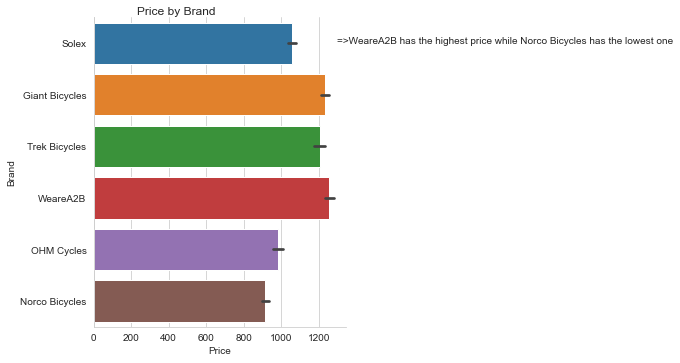

In [31]:
#Chart 3: Bar Chart
chart_3 = sns.catplot(x="list_price", y="brand",
            data=trans_demo,
            kind="bar")
chart_3.fig.suptitle("Price by Brand", y=1)
plt.annotate("=>WeareA2B has the highest price while Norco Bicycles has the lowest one",xy=(1300,0),xytext=(1300,0))
chart_3.set(xlabel="Price",ylabel="Brand")
plt.show()

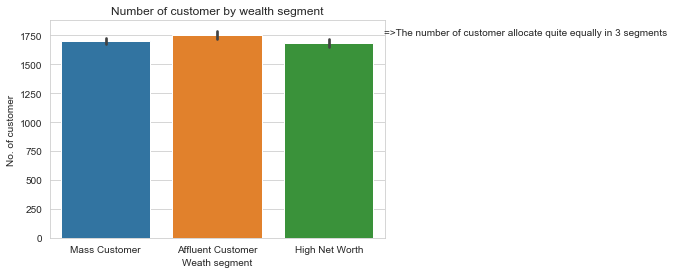

In [32]:
chart_4 = sns.barplot(x="wealth_segment",y="customer_id", data=trans_demo)
chart_4.set_title("Number of customer by wealth segment")
plt.annotate("=>The number of customer allocate quite equally in 3 segments",xy=(2.5,1750))
chart_4.set(xlabel="Weath segment",ylabel="No. of customer")
plt.show()

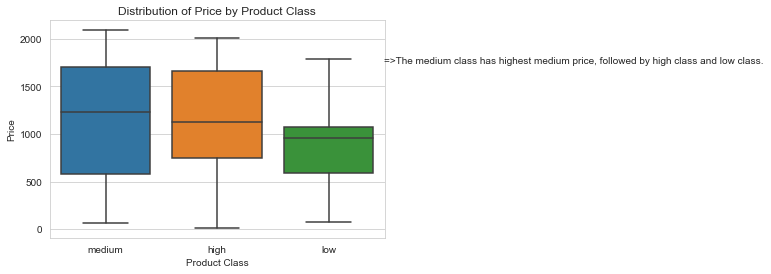

In [33]:
chart_5 = sns.boxplot(x = 'product_class', y = 'list_price', data = trans_demo)
chart_5.set_title("Distribution of Price by Product Class")
plt.annotate("=>The medium class has highest medium price, followed by high class and low class.",xy=(2.5,1750))
chart_5.set(xlabel="Product Class",ylabel="Price")
plt.show()